In [1]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt

ticker = "EURINR=X"
start_date = "2023-01-01"
end_date = "2024-10-01" #taking this as last as the last date isnt included in python

data = yf.download(ticker, start=start_date, end=end_date)
data.to_csv("EUR_INR_data.csv")

print(data.tail())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2024-09-24  92.775002  93.248001  92.671997  92.753998  92.753998       0
2024-09-25  93.490997  93.627998  93.083000  93.438004  93.438004       0
2024-09-26  92.995003  93.467003  92.994003  93.000999  93.000999       0
2024-09-27  93.371002  93.629997  93.037003  93.367996  93.367996       0
2024-09-30  92.414001  93.839996  92.414001  93.369003  93.369003       0


In [2]:
# Calculating Moving Averages

# For 1 day
data['MA_1D'] = data['Close'].rolling(window=1).mean()

# For 1 week
data['MA_1W'] = data['Close'].rolling(window=5).mean()

# Calculating Bollinger Bands
data['BB_Middle'] = data['Close'].rolling(window=20).mean() # Using Medium Term i.e. 20 days
data['BB_Upper'] = data['BB_Middle'] + 2 * data['Close'].rolling(window=20).std()
data['BB_Lower'] = data['BB_Middle'] - 2 * data['Close'].rolling(window=20).std()

# Calculating CCI
data['CCI'] = ta.trend.cci(data['High'], data['Low'], data['Close'], window=20) #using technical analysis library(ta)

print(data.tail())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2024-09-24  92.775002  93.248001  92.671997  92.753998  92.753998       0   
2024-09-25  93.490997  93.627998  93.083000  93.438004  93.438004       0   
2024-09-26  92.995003  93.467003  92.994003  93.000999  93.000999       0   
2024-09-27  93.371002  93.629997  93.037003  93.367996  93.367996       0   
2024-09-30  92.414001  93.839996  92.414001  93.369003  93.369003       0   

                MA_1D      MA_1W  BB_Middle   BB_Upper   BB_Lower         CCI  
Date                                                                           
2024-09-24  92.753998  93.020799   92.89905  93.657735  92.140366    2.106169  
2024-09-25  93.438004  93.087601   92.88485  93.587223  92.182478  152.514953  
2024-09-26  93.000999  93.102200   92.86995  93.547535  92.192365   82.080554  
2024-09-27  93.367996  93.134200   92.89445  93.607754  92.1

In [3]:
# Function For decision with moving average a 1 day and 1 week
def decision_ma(metric_value, close_value):
    
    if close_value > metric_value:
        return "BUY"
    elif close_value < metric_value:
        return "SELL"
    
    return "NEUTRAL"

# Function For decision with bollinger bands
def decision_bb(upper_band, lower_band, close_value):
    
    if close_value < lower_band:
        return "BUY"
    elif close_value > upper_band:
        return "SELL"
    
    return "NEUTRAL"

# Function For decision with CCI
def decision_cci(cci_value):
    
    if cci_value < -100:
        return "BUY"
    elif cci_value > 100:
        return "SELL"
    
    return "NEUTRAL"

In [4]:
# technical analysis
analysis_date = '2024-09-30'
metrics = data.loc[analysis_date, ['MA_1D','MA_1W', 'BB_Upper', 'BB_Lower', 'CCI', 'Close']]

print(metrics)

MA_1D       93.369003
MA_1W       93.186000
BB_Upper    93.661526
BB_Lower    92.205475
CCI         76.245232
Close       93.369003
Name: 2024-09-30 00:00:00, dtype: float64


In [5]:
# Table of Decisions
decisions = pd.DataFrame({
    'Indicator': ['One-Day MA', 'One-Week MA', 'Bollinger Bands', 'CCI'],
    'Decision': [
        decision_ma(metrics['MA_1D'], metrics['Close']),
        decision_ma(metrics['MA_1W'], metrics['Close']),
        decision_bb(metrics['BB_Upper'], metrics['BB_Lower'], metrics['Close']),
        decision_cci(metrics['CCI'])
    ]
})
print(decisions)

         Indicator Decision
0       One-Day MA  NEUTRAL
1      One-Week MA      BUY
2  Bollinger Bands  NEUTRAL
3              CCI  NEUTRAL


In [6]:
#function to analyze every row
def analyze_row(row):
    
    return {
        'One-Day MA Decision': decision_ma(row['MA_1D'], row['Close']),
        'One-Week MA Decision': decision_ma(row['MA_1W'], row['Close']),
        'Bollinger Bands Decision': decision_bb(row['BB_Upper'], row['BB_Lower'], row['Close']),
        'CCI Decision': decision_cci(row['CCI'])
    }

#creating a new DataFrame with decisions
decisions_analysis = data.apply(analyze_row, axis=1, result_type='expand')

# Combining the original data with the decisions
full_analysis = pd.concat([data, decisions_analysis], axis=1)

#Saving
data.to_csv("analysed_EUR_INR_data.csv")

# Displaying the required analysis
print(full_analysis[['Close', 'MA_1D', 'MA_1W', 'BB_Upper', 'BB_Lower', 'CCI', 
                     'One-Day MA Decision', 'One-Week MA Decision', 
                     'Bollinger Bands Decision', 'CCI Decision']])

                Close      MA_1D      MA_1W   BB_Upper   BB_Lower         CCI  \
Date                                                                            
2023-01-02  88.482002  88.482002        NaN        NaN        NaN         NaN   
2023-01-03  88.300003  88.300003        NaN        NaN        NaN         NaN   
2023-01-04  87.219002  87.219002        NaN        NaN        NaN         NaN   
2023-01-05  87.605003  87.605003        NaN        NaN        NaN         NaN   
2023-01-06  86.827003  86.827003  87.686603        NaN        NaN         NaN   
...               ...        ...        ...        ...        ...         ...   
2024-09-24  92.753998  92.753998  93.020799  93.657735  92.140366    2.106169   
2024-09-25  93.438004  93.438004  93.087601  93.587223  92.182478  152.514953   
2024-09-26  93.000999  93.000999  93.102200  93.547535  92.192365   82.080554   
2024-09-27  93.367996  93.367996  93.134200  93.607754  92.181146  120.854816   
2024-09-30  93.369003  93.36

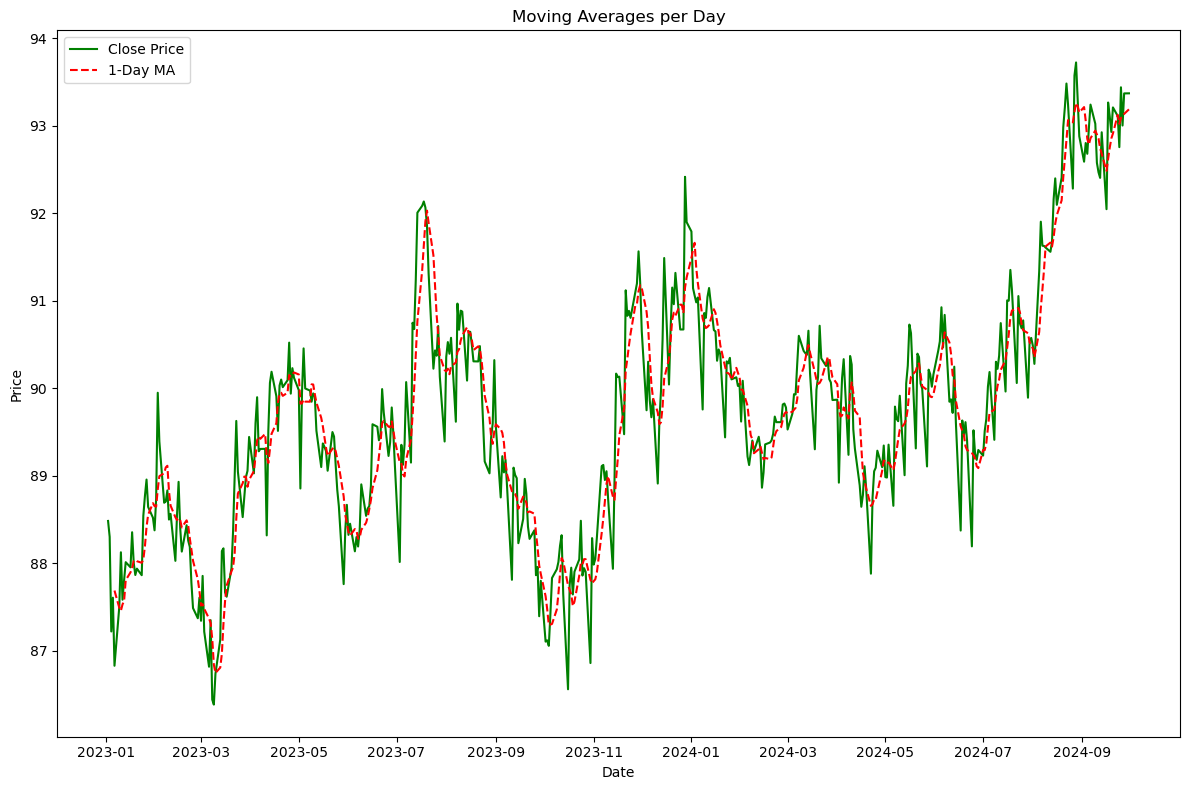

In [7]:
plt.figure(figsize=(12, 8))

# Moving Averages
plt.plot(data['Close'], label='Close Price', color='green')
plt.plot(data['MA_1W'], label='1-Day MA', linestyle='--', color='red')
plt.title("Moving Averages per Day")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# decision annotations for Moving Averages
for i in range(len(data)):
    decision = decisions_analysis.iloc[i]['One-Day MA Decision']
    if decision == 'BUY':
        plt.annotate('BUY', xy=(data.index[i], data['Close'].iloc[i]), 
                     xytext=(data.index[i], data['Close'].iloc[i] - 0.25), 
                     arrowprops=dict(facecolor='green', shrink=0.01, alpha = 0.5),
                     fontsize=8, color='green')
    elif decision == 'SELL':
        plt.annotate('SELL', xy=(data.index[i], data['Close'].iloc[i]), 
                     xytext=(data.index[i], data['Close'].iloc[i] + 0.25), 
                     arrowprops=dict(facecolor='red', shrink=0.01, alpha = 0.5),
                     fontsize=8, color='red')



plt.tight_layout()
plt.show()

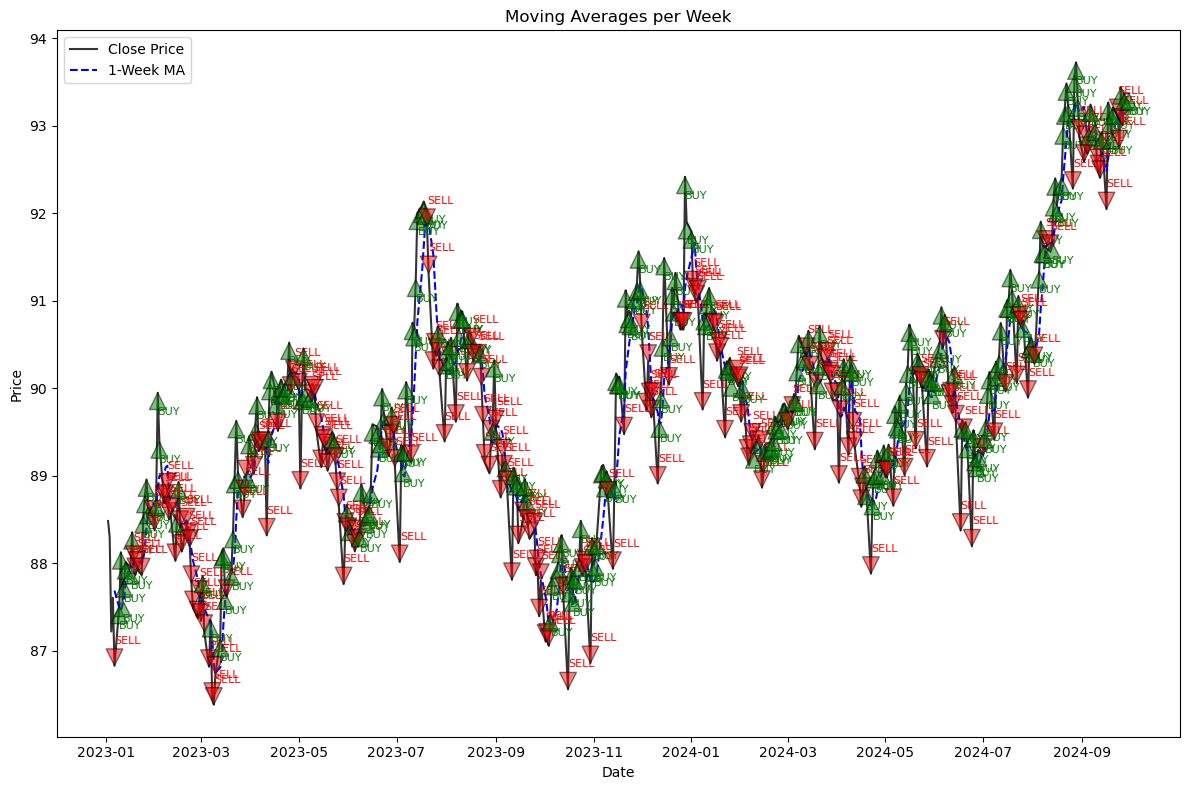

In [8]:
plt.figure(figsize=(12, 8))

# Moving Averages
plt.plot(data['Close'], label='Close Price', color='black', alpha = 0.8)
plt.plot(data['MA_1W'], label='1-Week MA', linestyle='--', color='blue')
plt.title("Moving Averages per Week")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# decision annotations for Moving Averages
for i in range(len(data)):
    decision = decisions_analysis.iloc[i]['One-Week MA Decision']
    if decision == 'BUY':
        plt.annotate('BUY', xy=(data.index[i], data['Close'].iloc[i]), 
                     xytext=(data.index[i], data['Close'].iloc[i] - 0.25), 
                     arrowprops=dict(facecolor='green', shrink=0.01, alpha = 0.5),
                     fontsize=8, color='green')
    elif decision == 'SELL':
        plt.annotate('SELL', xy=(data.index[i], data['Close'].iloc[i]), 
                     xytext=(data.index[i], data['Close'].iloc[i] + 0.25), 
                     arrowprops=dict(facecolor='red', shrink=0.01, alpha = 0.5),
                     fontsize=8, color='red')



plt.tight_layout()
plt.show()

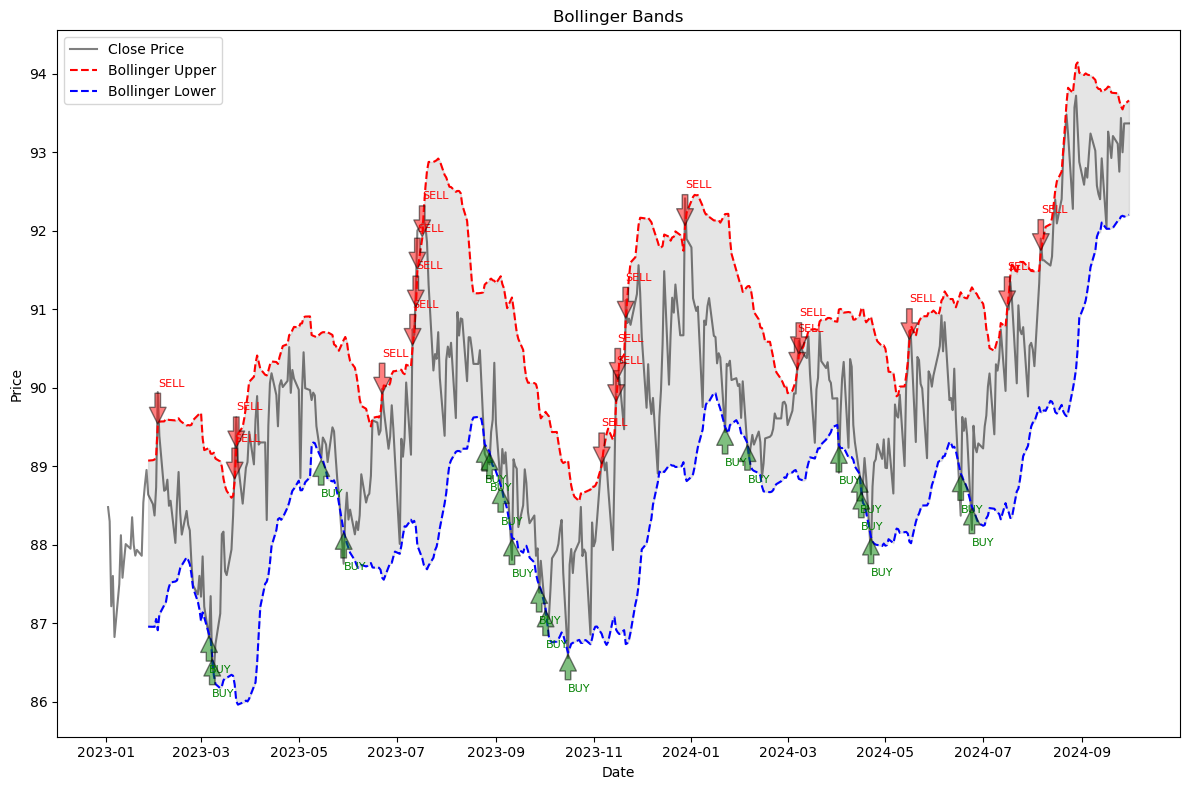

In [9]:
plt.figure(figsize=(12, 8))

# Bollinger Bands
plt.plot(data['Close'], label='Close Price', color='black', alpha=0.5)
plt.plot(data['BB_Upper'], label='Bollinger Upper', linestyle='--', color='red')
plt.plot(data['BB_Lower'], label='Bollinger Lower', linestyle='--', color='blue')
plt.fill_between(data.index, data['BB_Upper'], data['BB_Lower'], color='gray', alpha=0.2)
plt.title("Bollinger Bands")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
# Add decision annotations for Bollinger Bands
for i in range(len(data)):
    bb_decision = decisions_analysis.iloc[i]['Bollinger Bands Decision']
    if bb_decision == 'BUY':
        plt.annotate('BUY', xy=(data.index[i], data['BB_Lower'].iloc[i]), 
                     xytext=(data.index[i], data['BB_Lower'].iloc[i] - 0.5), 
                     arrowprops=dict(facecolor='green', shrink=0.05, alpha = 0.5),
                     fontsize=8, color='green')
    elif bb_decision == 'SELL':
        plt.annotate('SELL', xy=(data.index[i], data['BB_Upper'].iloc[i]), 
                     xytext=(data.index[i], data['BB_Upper'].iloc[i] + 0.5), 
                     arrowprops=dict(facecolor='red', shrink=0.05, alpha = 0.5),
                     fontsize=8, color='red')

        
plt.tight_layout()
plt.show()

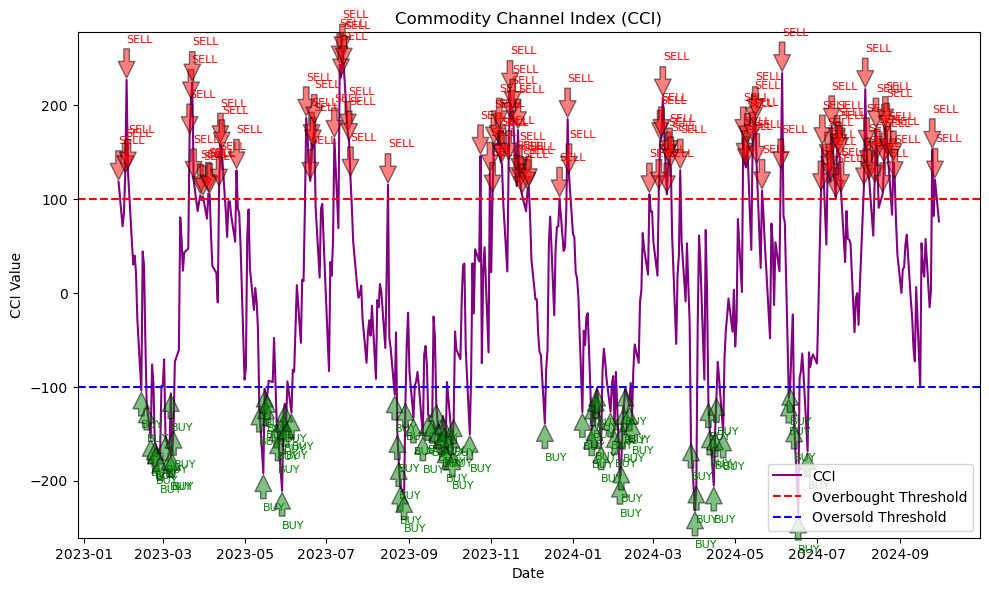

In [10]:
plt.figure(figsize=(10, 6))

# CCI 
plt.plot(data['CCI'], label='CCI', color='purple')
plt.axhline(100, color='red', linestyle='--', label="Overbought Threshold")
plt.axhline(-100, color='blue', linestyle='--', label="Oversold Threshold")
plt.title("Commodity Channel Index (CCI)")
plt.xlabel('Date')
plt.ylabel('CCI Value')

# Add decision annotations for CCI
for i in range(len(data)):
    cci_decision = decisions_analysis.iloc[i]['CCI Decision']
    if cci_decision == 'BUY':
        plt.annotate('BUY', xy=(data.index[i], data['CCI'].iloc[i]), 
                     xytext=(data.index[i], data['CCI'].iloc[i] - 40), 
                     arrowprops=dict(facecolor='green', shrink=0.05, alpha = 0.5),
                     fontsize=8, color='green')
    elif cci_decision == 'SELL':
        plt.annotate('SELL', xy=(data.index[i], data['CCI'].iloc[i]), 
                     xytext=(data.index[i], data['CCI'].iloc[i] + 40), 
                     arrowprops=dict(facecolor='red', shrink=0.05, alpha = 0.5),
                     fontsize=8, color='red')

plt.legend()
plt.tight_layout()
plt.show()